<a href="https://colab.research.google.com/github/anikulgit/Python_GlobalSuperStore/blob/main/GlobalSuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# mounting google drive to colab
from google.colab import drive
drive.mount('/content/gdrive') #Connecting to google Drive folder

Mounted at /content/gdrive


In [ ]:
# creating dataset form excel file
gstor=pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/GlobalSuperStore/global_superstore.xlsx')

In [ ]:
#just having a head() watch on data
gstor.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
# checking for total null values under each heading / column
gstor.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
# checking for the datatypes of all columns, specially order date & ship date for proper date format and sales, quantity etc. for number type
#converting to appropriate datatype if needed.
gstor.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [ ]:
# Creating a comumn for year only
gstor['Order Year']= gstor['Order Date'].dt.year

In [ ]:
# checking for created column
gstor.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
Order Year                 int32
dtype: object

In [ ]:
gstor['Order Year']=pd.to_datetime(gstor['Order Year'])

In [ ]:
gstor.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
Order Year        datetime64[ns]
dtype: object

In [ ]:
#checking the Head again before starting the data operations.
gstor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

Lets split the data in two datasets, one contian the numeric and another contians categorical data.

In [ ]:
# creating the new dataset which contain numerical comumns only
gstor_num= gstor.select_dtypes(include=np.number)

In [ ]:
# remove Row ID, postal code, as they contains lots of null values.
gstor_num.drop(['Row ID'], axis=1, inplace=True)
gstor_num.drop(['Postal Code'],  axis=1, inplace=True)

In [ ]:
gstor_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales          51290 non-null  float64
 1   Quantity       51290 non-null  int64  
 2   Discount       51290 non-null  float64
 3   Profit         51290 non-null  float64
 4   Shipping Cost  51290 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.0 MB


In [ ]:
# creating the separate dataset for oject / categorical dataset
gstor_cat = gstor.select_dtypes(include=[object])

In [ ]:
gstor_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order ID        51290 non-null  object
 1   Ship Mode       51290 non-null  object
 2   Customer ID     51290 non-null  object
 3   Customer Name   51290 non-null  object
 4   Segment         51290 non-null  object
 5   City            51290 non-null  object
 6   State           51290 non-null  object
 7   Country         51290 non-null  object
 8   Region          51290 non-null  object
 9   Market          51290 non-null  object
 10  Product ID      51290 non-null  object
 11  Category        51290 non-null  object
 12  Sub-Category    51290 non-null  object
 13  Product Name    51290 non-null  object
 14  Order Priority  51290 non-null  object
dtypes: object(15)
memory usage: 5.9+ MB


In [ ]:
#chehck for zeros or null
gstor_num.isnull().sum()

Sales            0
Quantity         0
Discount         0
Profit           0
Shipping Cost    0
dtype: int64

In [ ]:
# checking the data distribution of numeric columns

In [ ]:
for cols in gstor_num:
    print("\n"+ cols)
    print(f" Skew {gstor_num[cols].skew()}")


Sales
 Skew 8.13808002122054

Quantity
 Skew 1.3603677307024202

Discount
 Skew 1.3877745521338385

Profit
 Skew 4.157188532777363

Shipping Cost
 Skew 5.872860637018437



Sales
 Skew 8.13808002122054


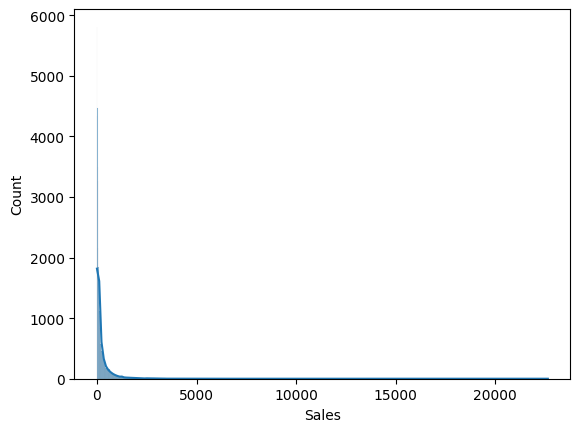


Quantity
 Skew 1.3603677307024202


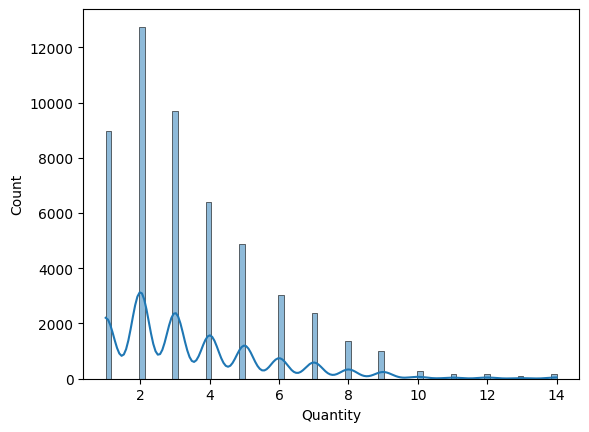


Discount
 Skew 1.3877745521338385


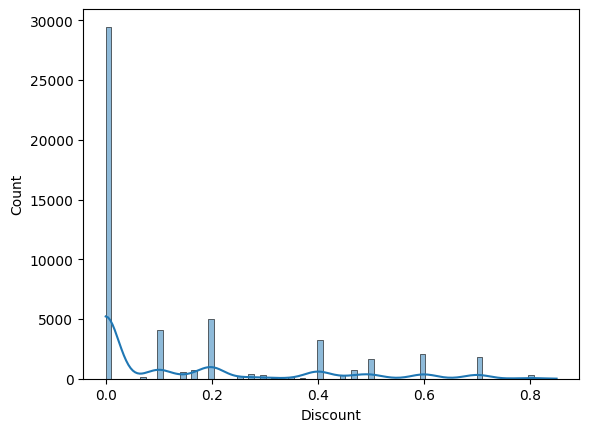


Profit
 Skew 4.157188532777363


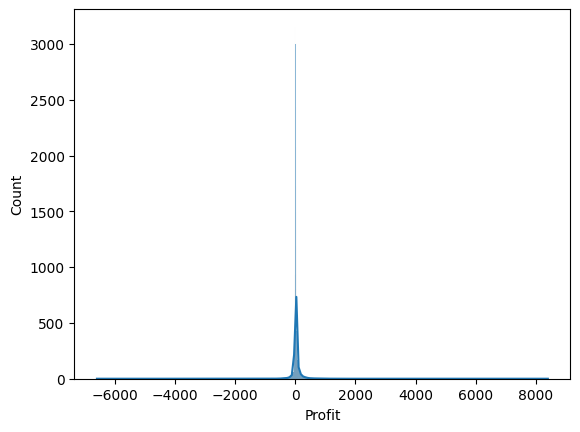


Shipping Cost
 Skew 5.872860637018437


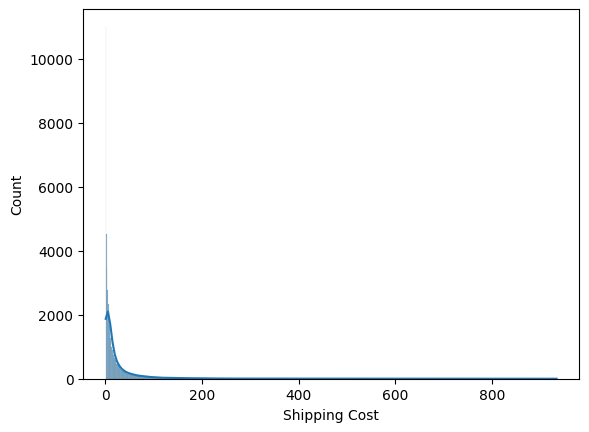

In [ ]:
# check by histogram
for cols in gstor_num:
    print("\n"+ cols)
    print(f" Skew {gstor_num[cols].skew()}")
    plt.figure()
    sns.histplot(gstor_num[cols], kde=True)
    plt.show()

As we can see that the sales, discount and profit are highly right skewed, we need to process the skewness to meke the data centrally destributed.




Lets check for the outliers in boxplot

Sales total 51290
Outliers 5655 (11.025541041138624 %)
Skew is 8.13808002122054


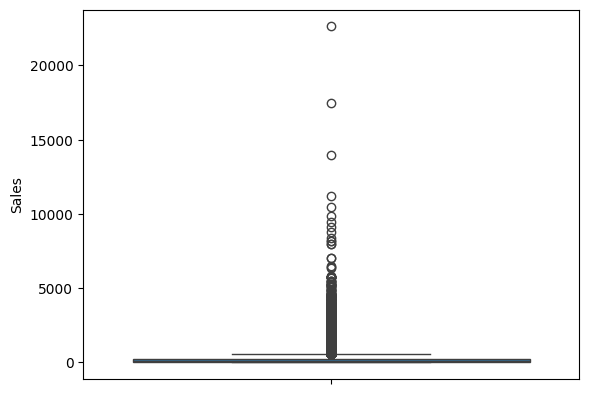

Quantity total 51290
Outliers 877 (1.7098849678299863 %)
Skew is 1.3603677307024202


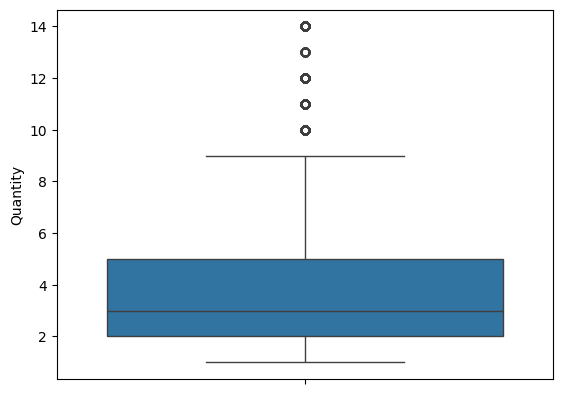

Discount total 51290
Outliers 4172 (8.134139208422695 %)
Skew is 1.3877745521338385


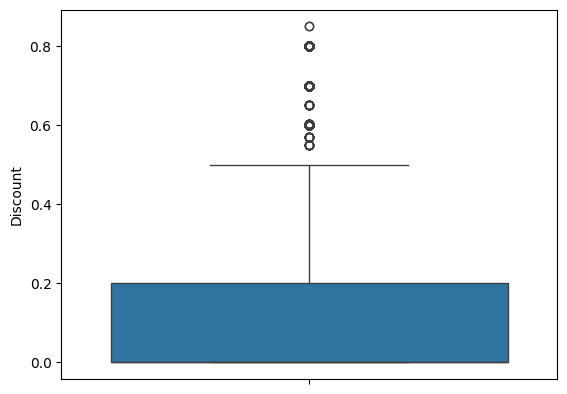

Profit total 51290
Outliers 9755 (19.01930200818873 %)
Skew is 4.157188532777363


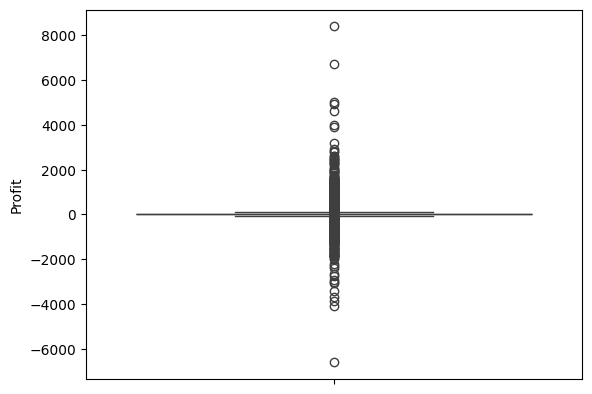

Shipping Cost total 51290
Outliers 5909 (11.520764281536362 %)
Skew is 5.872860637018437


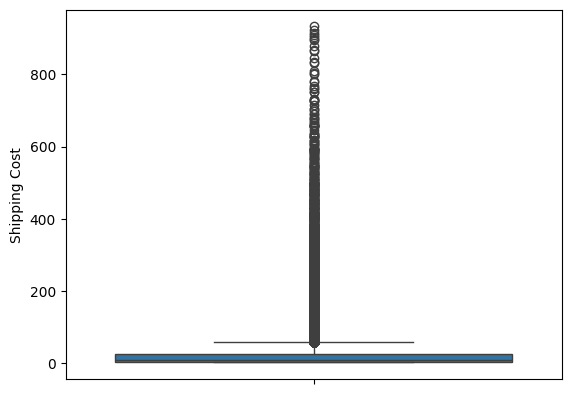

In [ ]:
#lets just check for the outliers in boxplot
for cols in gstor_num:

    #counting Outliers by IQR Method (Inter QUartile RAnge)
    qt1 = gstor_num[cols].quantile(0.25)  # First quartile
    qt3 = gstor_num[cols].quantile(0.75)  # Third quartile
    iqr = qt3 - qt1

    # Lower and upper bounds for outliers
    lower_bound = qt1 - 1.5 * iqr
    upper_bound = qt3 + 1.5 * iqr

    # Count outliers
    otl = gstor_num[cols][(gstor_num[cols] < lower_bound) | (gstor_num[cols] > upper_bound)].count()
    print(f"{cols} total {gstor_num[cols].count()}")
    print(f"Outliers {otl} ({(otl*100)/gstor_num[cols].count()} %)")
    print(f"Skew is {gstor_num[cols].skew()}")

    plt.figure()
    sns.boxplot(y=gstor_num[cols])
    plt.show()


Sales, Profit & Shipping cost have many outliers, whereas discount & quantity outliers are very low in numbers.

generally we apply square root method or log method to handle the skewness, but it will be a good prectice to **check for the correlation coefficient** between the columns & think for the impact of change on that relation.

to check the co-relation, we will use corelation function and plot that corelation table in the histogram


In [ ]:
gstor_num.corr()

,Sales,Quantity,Discount,Profit,Shipping Cost
Sales,1.000000,0.313577,-0.086722,0.484918,0.767835
Quantity,0.313577,1.000000,-0.019875,0.104365,0.271804
Discount,-0.086722,-0.019875,1.000000,-0.316490,-0.078153
Profit,0.484918,0.104365,-0.316490,1.000000,0.354423
Shipping Cost,0.767835,0.271804,-0.078153,0.354423,1.000000


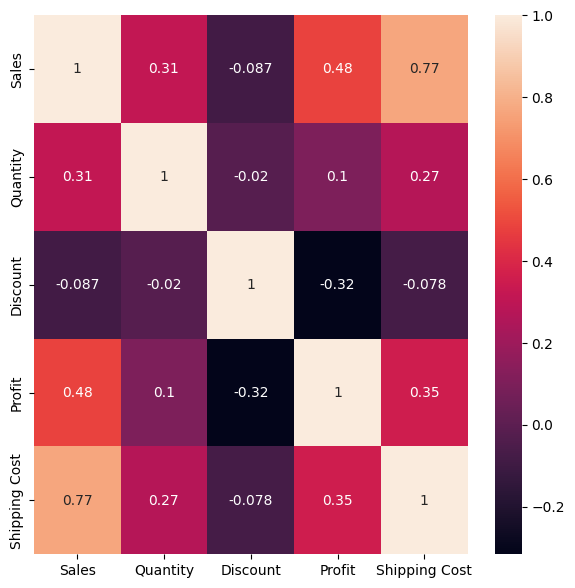

In [ ]:
# converting it to chart for more clear visual
plt.figure(figsize=(7,7))
sns.heatmap(gstor_num.corr(), annot=True) # annot include data values in each cell
plt.show()

By observing the above correlation, the linear relation in sales and quantity and linear relation in sales and profit is important. If we use the capping or trimming, the correlation coefficient may disturb and will effect the end result.

To make the data normally distrubuted without disturbing the correlation, let's just try winzorizing mehtod for outliers.

In [ ]:
# Generating all details for the transformation
for cols in gstor_num:

    #counting Outliers by IQR Method (Inter QUartile RAnge)
    qt1 = gstor_num[cols].quantile(0.25)  # First quartile
    qt3 = gstor_num[cols].quantile(0.75)  # Third quartile
    iqr = qt3 - qt1

    # Lower and upper bounds for outliers
    lower_bound = qt1 - 1.5 * iqr
    upper_bound = qt3 + 1.5 * iqr

    # Count outliers
    otl = gstor_num[cols][(gstor_num[cols] < lower_bound) | (gstor_num[cols] > upper_bound)].count()

    # Printing The Stats of column before the charts
    print(f"{cols} total {gstor_num[cols].count()}")
    print(f"Outliers {otl} ({(otl*100)/gstor_num[cols].count()} %)")
    print(f"Skew is {gstor_num[cols].skew()}")
    print (f"The lower quarter (below 25%) {qt1} and the upper quarter (above 75%) {qt3}")
    print(f"InterQuartal Range {iqr} with Lower bound {lower_bound} and upper bound {upper_bound}\n")


Sales total 51290
Outliers 5655 (11.025541041138624 %)
Skew is 8.13808002122054
The lower quarter (below 25%) 30.758625000000002 and the upper quarter (above 75%) 251.0532
InterQuartal Range 220.294575 with Lower bound -299.6832375 and upper bound 581.4950625

Quantity total 51290
Outliers 877 (1.7098849678299863 %)
Skew is 1.3603677307024202
The lower quarter (below 25%) 2.0 and the upper quarter (above 75%) 5.0
InterQuartal Range 3.0 with Lower bound -2.5 and upper bound 9.5

Discount total 51290
Outliers 4172 (8.134139208422695 %)
Skew is 1.3877745521338385
The lower quarter (below 25%) 0.0 and the upper quarter (above 75%) 0.2
InterQuartal Range 0.2 with Lower bound -0.30000000000000004 and upper bound 0.5

Profit total 51290
Outliers 9755 (19.01930200818873 %)
Skew is 4.157188532777363
The lower quarter (below 25%) 0.0 and the upper quarter (above 75%) 36.81
InterQuartal Range 36.81 with Lower bound -55.215 and upper bound 92.025

Shipping Cost total 51290
Outliers 5909 (11.520764

Implimenting the winsirize to sales, profit & shipping cost. Need to impliment separate code for each column, because the outliers percentage is different for each column

Parellely creating the new dataset for numeric columns with winzorized values

In [ ]:
gstor_winz=pd.DataFrame()

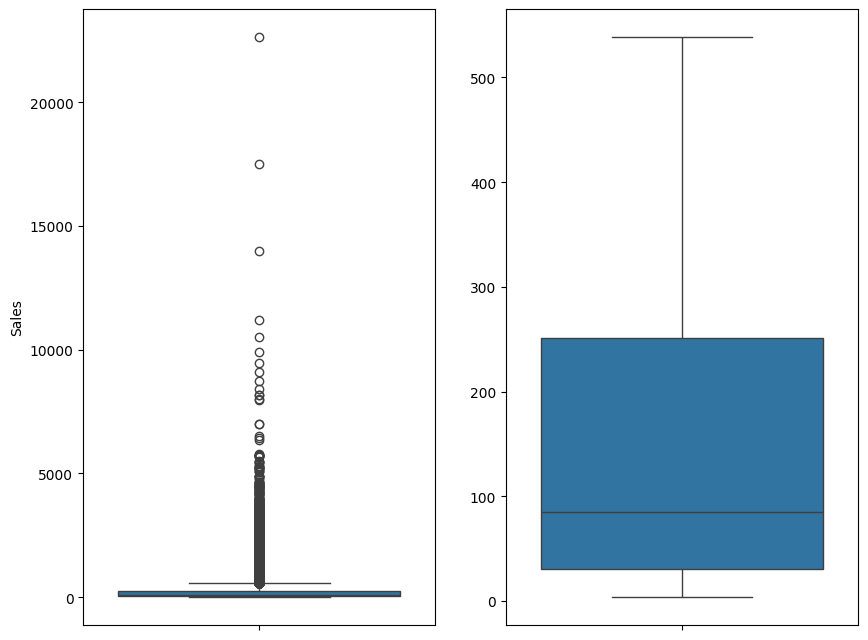

In [ ]:
# sales
fig, ax = plt.subplots(ncols=2, figsize=(10,8))
sns.boxplot(y= gstor_num['Sales'], ax=ax[0])
sns.boxplot(y= stats.mstats.winsorize(a=gstor_num['Sales'], limits=(0.01,0.12)), ax=ax[1])
plt.show()

# Adding to new dataset as column
gstor_winz["Sales"]=stats.mstats.winsorize(a=gstor_num['Sales'], limits=(0.01,0.12))


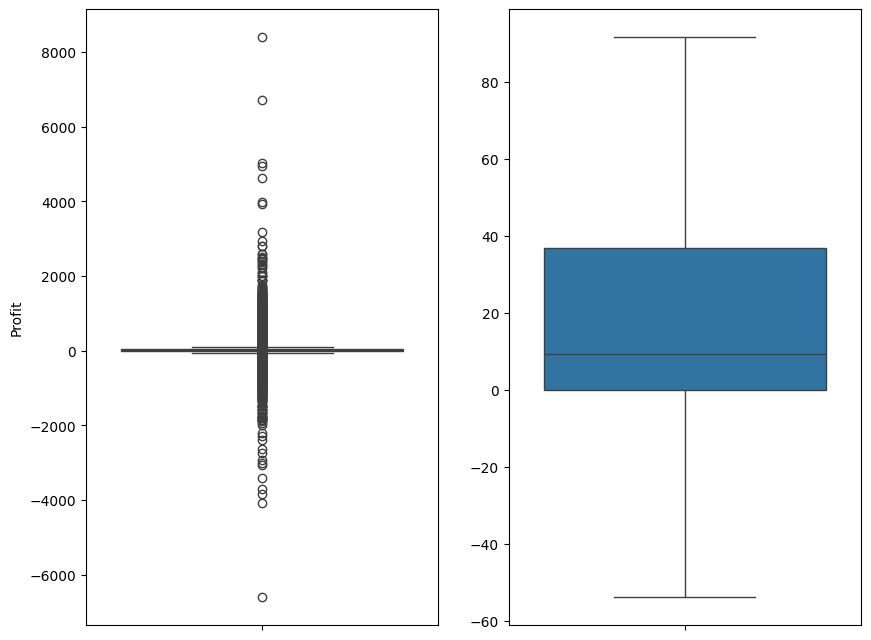

In [ ]:
# profit
fig, ax = plt.subplots(ncols=2, figsize=(10,8))
sns.boxplot(y= gstor_num['Profit'], ax=ax[0])
sns.boxplot(y= stats.mstats.winsorize(a=gstor_num['Profit'], limits=(0.07,0.122)), ax=ax[1])
plt.show()

# Adding to new dataset as column
gstor_winz["Profit"]=stats.mstats.winsorize(a=gstor_num['Profit'], limits=(0.07,0.122))

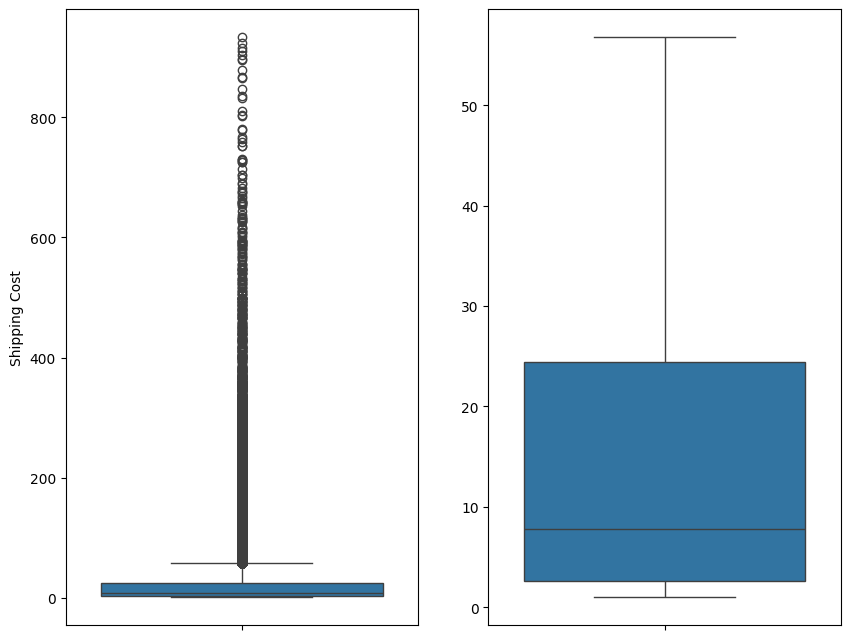

In [ ]:
# Shipping Cost
fig, ax = plt.subplots(ncols=2, figsize=(10,8))
sns.boxplot(y= gstor_num['Shipping Cost'], ax=ax[0])
sns.boxplot(y= stats.mstats.winsorize(a=gstor_num['Shipping Cost'], limits=(0.00,0.116)), ax=ax[1])
plt.show()

# Adding to new dataset as column
gstor_winz["Shipping Cost"]=stats.mstats.winsorize(a=gstor_num['Shipping Cost'], limits=(0.00,0.116))

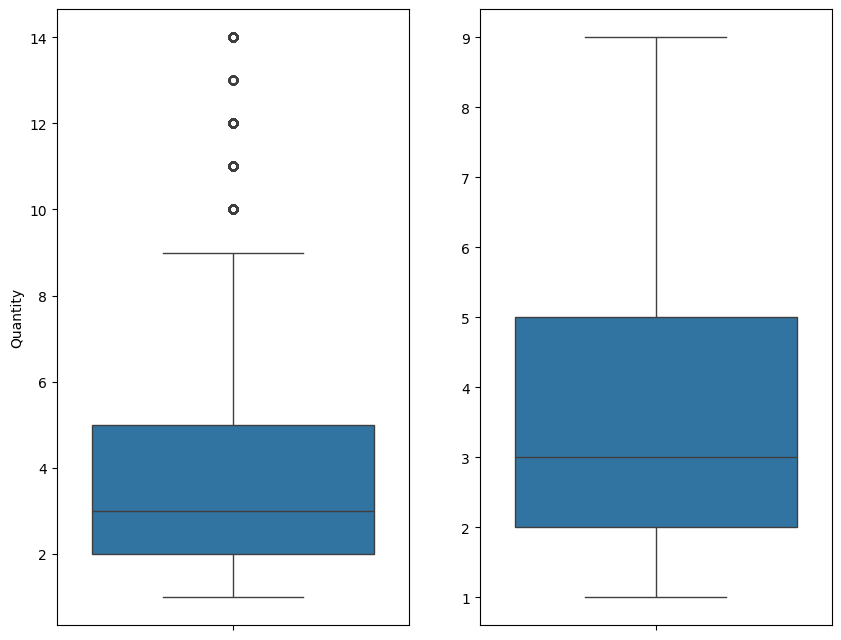

In [ ]:
#Quantity
fig, ax = plt.subplots(ncols=2, figsize=(10,8))
sns.boxplot(y= gstor_num['Quantity'], ax=ax[0])
sns.boxplot(y= stats.mstats.winsorize(a=gstor_num['Quantity'], limits=(0.00,0.018)), ax=ax[1])
plt.show()

# Adding to new dataset as column
gstor_winz["Quantity"]=stats.mstats.winsorize(a=gstor_num['Quantity'], limits=(0.00,0.018))

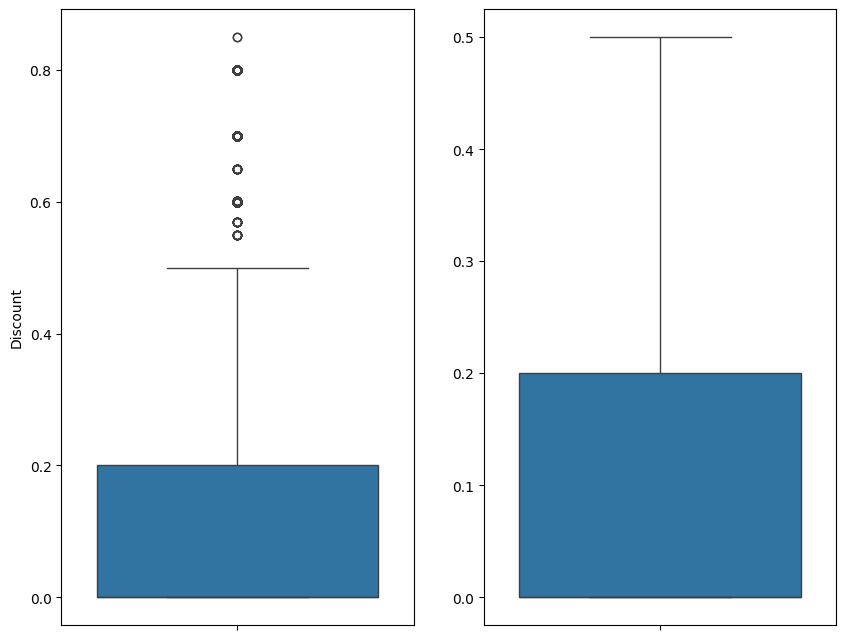

In [ ]:
#Discount
fig, ax = plt.subplots(ncols=2, figsize=(10,8))
sns.boxplot(y= gstor_num['Discount'], ax=ax[0])
sns.boxplot(y= stats.mstats.winsorize(a=gstor_num['Discount'], limits=(0.00,0.082)), ax=ax[1])
plt.show()

# Adding to new dataset as column
gstor_winz["Discount"]=stats.mstats.winsorize(a=gstor_num['Discount'], limits=(0.00,0.082))

In [ ]:
gstor_winz.head()

,Sales,Quantity,Discount,Profit,Shipping Cost
0,221.980,2,0.0,62.1544,40.770
1,538.488,9,0.1,-53.8548,56.804
2,538.488,9,0.1,91.6800,56.804
3,538.488,5,0.1,-53.8548,56.804
4,538.488,8,0.0,91.6800,56.804


In [ ]:
gstor_winz.corr()

,Sales,Profit,Shipping Cost,Discount,Quantity
Sales,1.000000,0.487773,0.889786,-0.112598,0.358339
Profit,0.487773,1.000000,0.443856,-0.575081,0.183308
Shipping Cost,0.889786,0.443856,1.000000,-0.103308,0.327797
Discount,-0.112598,-0.575081,-0.103308,1.000000,-0.007026
Quantity,0.358339,0.183308,0.327797,-0.007026,1.000000


In [ ]:
# rearranging the new dataset like original one
gstor_winz=gstor_winz.reindex_like(gstor_num)

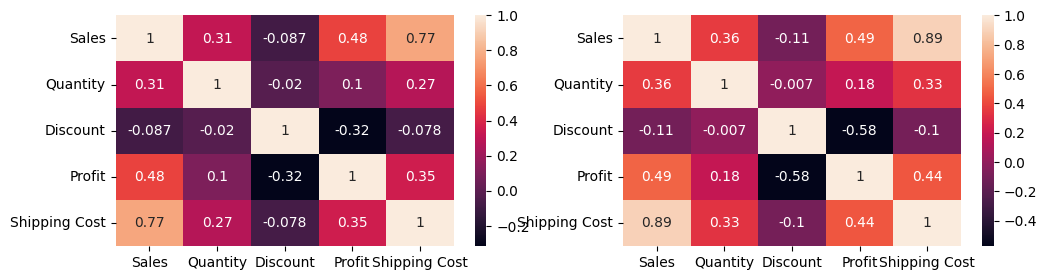

In [ ]:
# converting it to chart for more clear visual
fig, ax=plt.subplots(ncols=2, figsize=(12,3) )
#plt.figure(figsize=(10,7))
sns.heatmap(gstor_num.corr(), annot=True, ax=ax[0])
sns.heatmap(gstor_winz.corr(), annot=True, ax=ax[1])
plt.show()

As we can see that the winsorized data also have much better correlation coefficient in values. The data now looks clean & ready to analyze.